**IMPORTAÇÃO DA BIBLIOTECA**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
!pip install prince
import prince  # Install with pip install prince
!pip install xgboost
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd # Add this line to import the pandas library

df = pd.read_csv('/content/colorectal_cancer_prediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

In [ ]:
  df.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [ ]:
df.tail()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
89940,89941,72,Male,White,North America,Urban,Middle,No,No,IV,...,Yes,Timely,Good,No,No,Yes,Poor,Deceased,No,25
89941,89942,59,Female,Asian,North America,Urban,Low,No,No,II,...,Yes,Delayed,Good,No,No,Yes,Good,Survived,No,46
89942,89943,77,Female,White,Africa,Rural,High,Yes,No,I,...,Yes,Delayed,Good,No,Yes,No,Good,Survived,Yes,41
89943,89944,37,Male,Other,North America,Rural,High,No,No,II,...,Yes,Timely,Limited,No,No,Yes,Good,Survived,No,47
89944,89945,69,Male,White,Europe,Urban,Middle,No,No,IV,...,Yes,Timely,Good,No,No,Yes,Good,Deceased,No,35


In [ ]:
# ... (código de conversão como mostrado anteriormente) ...

print(df.head()) # Imprime as primeiras 5 linhas para uma visualização rápida

   Patient_ID  Age  Gender   Race         Region Urban_or_Rural  \
0           1   71    Male  Other         Europe          Urban   
1           2   34  Female  Black  North America          Urban   
2           3   80  Female  White  North America          Urban   
3           4   40    Male  Black  North America          Rural   
4           5   43  Female  White         Europe          Urban   

  Socioeconomic_Status Family_History Previous_Cancer_History  \
0               Middle            Yes                      No   
1               Middle             No                      No   
2               Middle             No                      No   
3                  Low             No                      No   
4                 High            Yes                      No   

  Stage_at_Diagnosis  ... Insurance_Coverage Time_to_Diagnosis  \
0                III  ...                Yes           Delayed   
1                  I  ...                 No            Timely   
2       

Explicação:

Importar bibliotecas necessárias: Importamos pandas para manipulação de DataFrame, LabelEncoder para codificação de rótulo e OneHotEncoder para codificação one-hot.
Identificar colunas de texto: Encontramos colunas com dados de texto (dtype 'object') e as armazenamos em text_cols.
Codificação de Rótulo: Iteramos pelas colunas de texto, aplicamos LabelEncoder e substituímos os valores de texto originais por rótulos numéricos.
Codificação One-Hot: Criamos um OneHotEncoder e o aplicamos às suas colunas de texto, resultando em um novo DataFrame com recursos codificados one-hot. Este DataFrame é então mesclado com seu DataFrame original, substituindo as colunas de texto.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/colorectal_cancer_prediction.csv');

# Supondo que seu DataFrame se chama df e já foi carregado
# Exemplo de como carregar o DataFrame (ajuste o caminho do arquivo se necessário):
# df = pd.read_csv('seu_arquivo_colorretal.csv')

colunas_para_converter = df.select_dtypes(include=['object']).columns

for coluna in colunas_para_converter:
    try:
        df[coluna] = pd.to_numeric(df[coluna], errors='raise').astype('int64')
        df.rename(columns={coluna: f'{coluna}_convertido'}, inplace=True)
    except ValueError:
        print(f"A coluna '{coluna}' não pôde ser convertida para int64 pois contém valores não numéricos.")
    except Exception as e:
        print(f"Ocorreu um erro ao processar a coluna '{coluna}': {e}")

print(df.dtypes)
print(df.head())

A coluna 'Gender' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Race' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Region' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Urban_or_Rural' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Socioeconomic_Status' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Family_History' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Previous_Cancer_History' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Stage_at_Diagnosis' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Tumor_Aggressiveness' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Colonoscopy_Access' não pôde ser convertida para int64 pois contém valores não numéricos.
A coluna 'Screening_Regularity' não p

# **Pré-processamento de Dados Categóricos com One-Hot Encoding para Análise de Câncer de Colorretal**

In [ ]:
  import pandas as pd
  # Importa a biblioteca Pandas, utilizada para manipulação e análise de dados em formato de DataFrame.
  from sklearn.preprocessing import OneHotEncoder
  # Importa a classe OneHotEncoder da biblioteca scikit-learn, utilizada para codificar variáveis categóricas.
  from sklearn.compose import ColumnTransformer
  # Importa a classe ColumnTransformer da biblioteca scikit-learn, utilizada para aplicar transformações diferentes a colunas específicas de um DataFrame.

  # Supondo que seu DataFrame se chama df e você já o carregou
  # Este comentário indica que o código assume que um DataFrame chamado 'df' já foi criado e preenchido com os dados relevantes.

  # Identifique as colunas categóricas
  colunas_categoricas = ['Gender', 'Race', 'Region', 'Urban_or_Rural', 'Socioeconomic_Status',
                          'Family_History', 'Previous_Cancer_History', 'Stage_at_Diagnosis',
                          'Tumor_Aggressiveness', 'Colonoscopy_Access', 'Screening_Regularity',
                          'Diet_Type', 'Physical_Activity_Level', 'Smoking_Status',
                          'Alcohol_Consumption', 'Red_Meat_Consumption', 'Fiber_Consumption',
                          'Insurance_Coverage', 'Time_to_Diagnosis', 'Treatment_Access',
                          'Chemotherapy_Received', 'Radiotherapy_Received', 'Surgery_Received',
                          'Follow_Up_Adherence', 'Survival_Status', 'Recurrence']
  # Esta lista define os nomes das colunas no DataFrame 'df' que contêm dados categóricos (não numéricos).
  # Essas colunas precisarão ser codificadas para que possam ser utilizadas em modelos de machine learning.

  # Crie o objeto OneHotEncoder
  encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
  # Cria uma instância da classe OneHotEncoder.
  # 'sparse_output=False' garante que a saída da codificação seja um array NumPy denso, em vez de uma matriz esparsa.
  # 'handle_unknown='ignore'' instrui o encoder a ignorar valores desconhecidos que possam aparecer durante a transformação, sem gerar um erro.

  # Ajuste o encoder aos dados categóricos e transforme-os
  encoded_data = encoder.fit_transform(df[colunas_categoricas])
  # 'fit()' ajusta o encoder aos dados categóricos, aprendendo as categorias únicas em cada coluna.
  # 'transform()' aplica a codificação one-hot aos dados categóricos, convertendo cada categoria em uma nova coluna binária (0 ou 1).
  # O resultado é armazenado na variável 'encoded_data' como um array NumPy.

  # Crie novos nomes de colunas para os dados codificados
  feature_names = encoder.get_feature_names_out(input_features=colunas_categoricas)
  # 'get_feature_names_out()' gera os nomes das novas colunas criadas pela codificação one-hot.
  # Ele usa os nomes das colunas originais categóricas como base para criar nomes únicos para cada nova coluna.

  # Crie um novo DataFrame com os dados codificados
  df_encoded = pd.DataFrame(encoded_data, columns=feature_names)
  # Cria um novo DataFrame chamado 'df_encoded' a partir do array NumPy 'encoded_data'.
  # As colunas deste novo DataFrame são nomeadas usando a lista 'feature_names'.

  # Concatene as colunas codificadas com as colunas não categóricas originais
  df_numerical = df.drop(columns=colunas_categoricas)
  # Cria um novo DataFrame chamado 'df_numerical' contendo apenas as colunas do DataFrame original 'df' que não estavam na lista 'colunas_categoricas'.
  # Isso remove as colunas categóricas originais para evitar redundância após a codificação.
  df_processed = pd.concat([df_numerical.reset_index(drop=True), df_encoded], axis=1)
  # 'pd.concat()' concatena (combina) dois DataFrames ao longo de um eixo específico.
  # '[df_numerical.reset_index(drop=True), df_encoded]' é uma lista dos DataFrames a serem concatenados.
  # 'axis=1' especifica que a concatenação deve ser feita ao longo das colunas (adicionando as colunas de 'df_encoded' à direita de 'df_numerical').
  # '.reset_index(drop=True)' reseta o índice de 'df_numerical' e descarta o índice antigo para garantir que os índices dos DataFrames a serem concatenados se alinhem corretamente.

  print(df_processed.head())
  # Imprime as primeiras 5 linhas do DataFrame 'df_processed', que agora contém as colunas numéricas originais e as colunas categóricas codificadas.
  print(df_processed.dtypes)
  # Imprime os tipos de dados de cada coluna no DataFrame 'df_processed' para verificar a transformação.

   Patient_ID  Age   BMI  Time_to_Recurrence  Gender_Female  Gender_Male  \
0           1   71  33.0                  16            0.0          1.0   
1           2   34  33.1                  28            1.0          0.0   
2           3   80  20.7                  26            1.0          0.0   
3           4   40  38.9                  44            0.0          1.0   
4           5   43  24.8                  20            1.0          0.0   

   Race_Asian  Race_Black  Race_Hispanic  Race_Other  ...  \
0         0.0         0.0            0.0         1.0  ...   
1         0.0         1.0            0.0         0.0  ...   
2         0.0         0.0            0.0         0.0  ...   
3         0.0         1.0            0.0         0.0  ...   
4         0.0         0.0            0.0         0.0  ...   

   Radiotherapy_Received_No  Radiotherapy_Received_Yes  Surgery_Received_No  \
0                       1.0                        0.0                  1.0   
1                 

# **Seleção de Features e Definição de Variáveis Alvo para Modelagem Preditiva de Câncer de Colorretal**

In [ ]:
  # As colunas que serão usadas como features (removendo todas as colunas alvo e possíveis colunas redundantes)
  feature_columns = [col for col in df_processed.columns if col not in [
      'Survival_Status_Deceased', 'Survival_Status_Survived',
      'Chemotherapy_Received_No', 'Chemotherapy_Received_Yes',
      'Radiotherapy_Received_No', 'Radiotherapy_Received_Yes',
      'Surgery_Received_No', 'Surgery_Received_Yes',
      'Recurrence_No', 'Recurrence_Yes' # Removendo também as colunas de recorrência se não forem features
  ]]
  # Cria uma lista chamada 'feature_columns' contendo os nomes de todas as colunas do DataFrame 'df_processed'
  # que não estão presentes na lista de colunas alvo ('Survival_Status', 'Chemotherapy_Received',
  # 'Radiotherapy_Received', 'Surgery_Received') e suas respectivas codificações one-hot, além das colunas de 'Recurrence'.
  # O objetivo é selecionar as colunas que serão utilizadas como variáveis independentes (features) para os modelos de previsão,
  # removendo as colunas que representam as variáveis que queremos prever (para evitar vazamento de dados) e colunas redundantes.

  # Crie a matriz de features (X)
  X = df_processed[feature_columns]
  # Cria um novo DataFrame chamado 'X' contendo apenas as colunas listadas em 'feature_columns' do DataFrame 'df_processed'.
  # 'X' representa a matriz de features que será utilizada para treinar os modelos de machine learning.

  # Crie as variáveis dependentes (y) para cada alvo
  y_survival = df_processed['Survival_Status_Survived'] # Assumindo que 'Survived' é o positivo
  # Cria uma Series chamada 'y_survival' contendo os valores da coluna 'Survival_Status_Survived' do DataFrame 'df_processed'.
  # Esta Series representa a variável dependente (o alvo) para a tarefa de prever a sobrevivência.
  # Assume-se que o valor 1.0 nesta coluna indica que o paciente sobreviveu (o rótulo positivo).

  y_chemo = df_processed['Chemotherapy_Received_Yes'] # Assumindo que 'Yes' é o positivo
  # Cria uma Series chamada 'y_chemo' contendo os valores da coluna 'Chemotherapy_Received_Yes' do DataFrame 'df_processed'.
  # Esta Series representa a variável dependente para a tarefa de prever se o paciente recebeu quimioterapia.
  # Assume-se que o valor 1.0 nesta coluna indica que o paciente recebeu quimioterapia (o rótulo positivo).

  y_radio = df_processed['Radiotherapy_Received_Yes'] # Assumindo que 'Yes' é o positivo
  # Cria uma Series chamada 'y_radio' contendo os valores da coluna 'Radiotherapy_Received_Yes' do DataFrame 'df_processed'.
  # Esta Series representa a variável dependente para a tarefa de prever se o paciente recebeu radioterapia.
  # Assume-se que o valor 1.0 nesta coluna indica que o paciente recebeu radioterapia (o rótulo positivo).

  y_surgery = df_processed['Surgery_Received_Yes'] # Assumindo que 'Yes' é o positivo
  # Cria uma Series chamada 'y_surgery' contendo os valores da coluna 'Surgery_Received_Yes' do DataFrame 'df_processed'.
  # Esta Series representa a variável dependente para a tarefa de prever se o paciente passou por cirurgia.
  # Assume-se que o valor 1.0 nesta coluna indica que o paciente passou por cirurgia (o rótulo positivo).

  # Exiba as primeiras linhas de X e de cada y para verificar
  print("Primeiras linhas de X:")
  print(X.head())
  # Imprime as primeiras 5 linhas do DataFrame 'X' para visualizar as features selecionadas.

  print("\nPrimeiras linhas de y_survival (Survival_Status_Survived):")
  print(y_survival.head())
  # Imprime as primeiras 5 linhas da Series 'y_survival' para verificar a variável alvo de sobrevivência.

  print("\nPrimeiras linhas de y_chemo (Chemotherapy_Received_Yes):")
  print(y_chemo.head())
  # Imprime as primeiras 5 linhas da Series 'y_chemo' para verificar a variável alvo de quimioterapia.

  print("\nPrimeiras linhas de y_radio (Radiotherapy_Received_Yes):")
  print(y_radio.head())
  # Imprime as primeiras 5 linhas da Series 'y_radio' para verificar a variável alvo de radioterapia.

  print("\nPrimeiras linhas de y_surgery (Surgery_Received_Yes):")
  print(y_surgery.head())
  # Imprime as primeiras 5 linhas da Series 'y_surgery' para verificar a variável alvo de cirurgia.

Primeiras linhas de X:
   Patient_ID  Age   BMI  Time_to_Recurrence  Gender_Female  Gender_Male  \
0           1   71  33.0                  16            0.0          1.0   
1           2   34  33.1                  28            1.0          0.0   
2           3   80  20.7                  26            1.0          0.0   
3           4   40  38.9                  44            0.0          1.0   
4           5   43  24.8                  20            1.0          0.0   

   Race_Asian  Race_Black  Race_Hispanic  Race_Other  ...  \
0         0.0         0.0            0.0         1.0  ...   
1         0.0         1.0            0.0         0.0  ...   
2         0.0         0.0            0.0         0.0  ...   
3         0.0         1.0            0.0         0.0  ...   
4         0.0         0.0            0.0         0.0  ...   

   Fiber_Consumption_Low  Fiber_Consumption_Medium  Insurance_Coverage_No  \
0                    1.0                       0.0                    0.0   

In [ ]:
print(df_processed.columns.tolist())

['Patient_ID', 'Age', 'BMI', 'Time_to_Recurrence', 'Gender_Female', 'Gender_Male', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Region_Africa', 'Region_Asia Pacific', 'Region_Europe', 'Region_Latin America', 'Region_North America', 'Urban_or_Rural_Rural', 'Urban_or_Rural_Urban', 'Socioeconomic_Status_High', 'Socioeconomic_Status_Low', 'Socioeconomic_Status_Middle', 'Family_History_No', 'Family_History_Yes', 'Previous_Cancer_History_No', 'Previous_Cancer_History_Yes', 'Stage_at_Diagnosis_I', 'Stage_at_Diagnosis_II', 'Stage_at_Diagnosis_III', 'Stage_at_Diagnosis_IV', 'Tumor_Aggressiveness_High', 'Tumor_Aggressiveness_Low', 'Tumor_Aggressiveness_Medium', 'Colonoscopy_Access_No', 'Colonoscopy_Access_Yes', 'Screening_Regularity_Irregular', 'Screening_Regularity_Never', 'Screening_Regularity_Regular', 'Diet_Type_Balanced', 'Diet_Type_Traditional', 'Diet_Type_Western', 'Physical_Activity_Level_High', 'Physical_Activity_Level_Low', 'Physical_Activity_Level_Medium',

# **Divisão de Dados em Treinamento e Teste para Modelagem de Sobrevivência ao Câncer de Cólon**

In [ ]:
from sklearn.model_selection import train_test_split
# Importa a função 'train_test_split' da biblioteca 'sklearn.model_selection'.
# Esta função é essencial para dividir um conjunto de dados em subconjuntos separados
# para treinamento de um modelo de machine learning e para avaliar seu desempenho em dados não vistos.

# Exemplo para o alvo 'Survival_Status'
# Comentário indicando que o código a seguir realiza a divisão dos dados
# especificamente para a variável alvo 'Survival_Status'.

X_train_survival, X_test_survival, y_train_survival, y_test_survival = train_test_split(
    X, y_survival, test_size=0.2, random_state=42
)
# Chama a função 'train_test_split' para dividir os dados em conjuntos de treinamento e teste.
# - 'X': Representa a matriz de features (variáveis independentes) que serão usadas para a previsão.
# - 'y_survival': Representa a variável alvo (dependente) que queremos prever, neste caso, a sobrevivência.
# - 'test_size=0.2': Especifica que 20% do conjunto de dados original será reservado para o conjunto de teste.
#                    Os 80% restantes serão usados para o conjunto de treinamento.
# - 'random_state=42': Define uma semente para o gerador de números aleatórios.
#                      Isso garante que a divisão dos dados seja a mesma cada vez que o código for executado,
#                      o que é importante para a reprodutibilidade dos resultados.
# A função retorna quatro conjuntos de dados:
# - 'X_train_survival': As features para o conjunto de treinamento do modelo de sobrevivência.
# - 'X_test_survival': As features para o conjunto de teste do modelo de sobrevivência.
# - 'y_train_survival': A variável alvo (sobrevivência) para o conjunto de treinamento.
# - 'y_test_survival': A variável alvo (sobrevivência) para o conjunto de teste.

# Repita este processo para os outros alvos (y_chemo, y_radio, y_surgery)
# Comentário instruindo o usuário a aplicar a mesma lógica de divisão de dados
# para as outras variáveis alvo ('y_chemo' para quimioterapia, 'y_radio' para radioterapia,
# e 'y_surgery' para cirurgia), caso se deseje treinar modelos preditivos para cada uma delas separadamente.
# Para cada alvo, você substituiria 'y_survival' pela variável alvo correspondente
# e armazenaria os conjuntos de treinamento e teste em novas variáveis (e.g., X_train_chemo, X_test_chemo, y_train_chemo, y_test_chemo).

# **Importação do Classificador XGBoost para Modelagem Preditiva**

In [ ]:
from xgboost import XGBClassifier
# Importa a classe 'XGBClassifier' da biblioteca 'xgboost'.
# O 'XGBClassifier' é uma implementação do algoritmo de Gradient Boosting
# para problemas de classificação. É um modelo poderoso e frequentemente
# utilizado em tarefas de machine learning devido ao seu desempenho e
# capacidade de lidar com dados complexos. Ao importar esta classe,
# tornamos disponível o uso do algoritmo XGBoost para construir
# modelos de classificação em nossos dados.

# **Inicialização de Modelos XGBoost com Parâmetros Padrão e Ajustados**

In [ ]:
# Usando parâmetros padrão
model = XGBClassifier()
# Cria uma instância do classificador XGBoost (XGBClassifier) com seus parâmetros default.
# Ao não especificar nenhum parâmetro, o modelo utilizará as configurações padrão definidas na biblioteca xgboost.
# Esta é uma maneira rápida de criar um modelo base para começar a experimentar ou para comparar com modelos ajustados.
# A instância do modelo é armazenada na variável 'model'.

# Especificando hiperparâmetros (exemplo)
model_tuned = XGBClassifier(objective='binary:logistic', # Especifica o objetivo da tarefa de classificação como logística binária.
                                                    # Isso é adequado para problemas onde a variável alvo tem duas classes (0 ou 1).
                            n_estimators=100,          # Define o número de árvores de boosting (ou "estimators") que serão construídas no modelo.
                                                    # Mais árvores podem levar a um melhor desempenho, mas também a um maior tempo de treinamento e risco de overfitting.
                            learning_rate=0.1,         # Controla a taxa de aprendizado, que determina o passo de encolhimento usado para evitar o overfitting.
                                                    # Valores menores tornam o aprendizado mais lento, mas podem levar a um modelo mais robusto.
                            max_depth=3,               # Define a profundidade máxima de cada árvore individual.
                                                    # Controla a complexidade do modelo; árvores mais profundas podem capturar relações mais complexas, mas também podem overfit.
                            random_state=42)
# Cria outra instância do classificador XGBoost (XGBClassifier), mas desta vez especificando manualmente alguns hiperparâmetros.
# Os hiperparâmetros são configurações que não são aprendidas diretamente pelos dados, mas que são definidas antes do treinamento.
# Ajustar esses parâmetros ('tuning') é uma etapa importante para otimizar o desempenho do modelo para um problema específico.
# 'random_state=42' garante que a inicialização aleatória do modelo seja a mesma cada vez que o código é executado, para reprodutibilidade.
# A instância do modelo com hiperparâmetros ajustados é armazenada na variável 'model_tuned'.

# **Treinamento do Modelo XGBoost Ajustado com Dados de Sobrevivência**

In [ ]:
# Use os dados de treinamento para ajustar o modelo com hiperparâmetros
model_tuned.fit(X_train_survival, y_train_survival)
# Chama o método 'fit()' da instância do modelo XGBoost que foi inicializada com hiperparâmetros ('model_tuned').
# O método 'fit()' é responsável por treinar o modelo usando os dados fornecidos.
# - 'X_train_survival': Contém as features (variáveis independentes) do conjunto de treinamento.
#                      O modelo aprenderá os padrões nesses dados para fazer previsões.
# - 'y_train_survival': Contém a variável alvo (dependente) correspondente ao conjunto de treinamento.
#                      Neste caso, representa a informação de sobrevivência para cada amostra no conjunto de treinamento.
# Durante o treinamento, o algoritmo XGBoost itera sobre as árvores de boosting,
# ajustando seus parâmetros internos para minimizar o erro entre as previsões do modelo
# e os valores reais da variável alvo no conjunto de treinamento.
# Após a execução desta linha, o modelo 'model_tuned' estará treinado e pronto para ser usado
# para fazer previsões em novos dados (como o conjunto de teste).

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# **Treinamento do Modelo XGBoost com Parâmetros Padrão (Garantindo Execução Sem Erros)**

In [ ]:
# Certifique-se de que esta célula é executada SEM erros
# Este comentário é uma instrução crucial para o usuário. Indica que a célula de código
# contendo a linha abaixo deve ser executada sem que ocorram exceções ou erros.
# Se houver algum problema na execução, o modelo 'model' não será treinado corretamente,
# e tentativas subsequentes de usar o modelo para fazer previsões ou avaliações falharão.

model.fit(X_train_survival, y_train_survival)
# Chama o método 'fit()' da instância do modelo XGBoost que foi inicializada com os parâmetros padrão ('model').
# O método 'fit()' é o processo de treinamento do modelo, onde ele aprende as relações
# entre as features ('X_train_survival') e a variável alvo ('y_train_survival') no conjunto de treinamento.
# Durante o treinamento, o algoritmo ajusta os parâmetros internos do modelo para minimizar a diferença
# entre suas previsões e os valores reais da variável alvo.
# Uma execução bem-sucedida desta linha é fundamental para que o modelo possa ser usado posteriormente
# para fazer previsões em dados não vistos.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# **Realização de Previsões de Sobrevivência com o Modelo XGBoost Treinado**

In [ ]:
y_pred_survival = model.predict(X_test_survival)
# Utiliza o método 'predict()' do modelo XGBoost treinado ('model') para gerar previsões
# sobre o conjunto de dados de teste ('X_test_survival').
# O modelo, tendo sido previamente treinado com os dados de treinamento, agora aplica o conhecimento
# aprendido para prever a classe (neste caso, se o paciente sobreviveu ou não) para cada amostra
# presente no conjunto de teste.
# As previsões geradas pelo modelo são armazenadas na variável 'y_pred_survival' como um array NumPy.
# Cada elemento deste array representa a classe prevista para a amostra correspondente em 'X_test_survival'.

print(y_pred_survival)
# Imprime o conteúdo da variável 'y_pred_survival', que contém as previsões de classe
# (provavelmente representadas por 0 e 1) para cada paciente no conjunto de teste.
# Esta saída permite visualizar as previsões feitas pelo modelo e compará-las posteriormente
# com os valores reais da variável alvo no conjunto de teste ('y_test_survival') para avaliar o desempenho do modelo.

[1 1 1 ... 1 1 1]


# **Importação de Métricas de Avaliação do scikit-learn**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Importa funções específicas do módulo 'metrics' da biblioteca 'sklearn' (scikit-learn).
# Estas funções são utilizadas para avaliar o desempenho de modelos de classificação,
# comparando as previsões feitas pelo modelo com os valores reais da variável alvo no conjunto de teste.
# - 'accuracy_score': Calcula a acurácia do modelo, que é a proporção de previsões corretas
#                   em relação ao número total de previsões.
# - 'confusion_matrix': Gera uma matriz de confusão, que é uma tabela que descreve o desempenho
#                     de um classificador em relação aos rótulos verdadeiros. Ela mostra
#                     os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
# - 'classification_report': Produz um relatório de texto que fornece métricas de precisão,
#                          recall, F1-score e suporte para cada classe do problema de classificação.
#                          É uma maneira abrangente de avaliar o desempenho do modelo por classe.
# Ao importar essas funções, tornamos disponível o uso dessas métricas para analisar a qualidade
# das previsões feitas pelo nosso modelo XGBoost.

# **Avaliação da Acurácia do Modelo de Sobrevivência**

In [ ]:
from sklearn.metrics import accuracy_score
# Importa a função 'accuracy_score' do módulo 'metrics' da biblioteca 'sklearn'.
# Esta função calcula a acurácia, que representa a proporção de previsões corretas
# feitas pelo modelo em relação ao número total de amostras no conjunto de teste.

accuracy = accuracy_score(y_test_survival, y_pred_survival)
# Chama a função 'accuracy_score' para calcular a acurácia do modelo.
# - 'y_test_survival': Contém os rótulos verdadeiros (os valores reais da variável alvo 'Survival_Status')
#                    para as amostras no conjunto de teste.
# - 'y_pred_survival': Contém as previsões de classe (0 ou 1 para não sobrevivência ou sobrevivência)
#                    feitas pelo modelo para as mesmas amostras no conjunto de teste.
# O resultado da função, que é o valor da acurácia, é armazenado na variável 'accuracy'.

print(f"Acurácia do modelo: {accuracy}")
# Imprime o valor da acurácia do modelo formatado em uma string.
# Esta saída informa a porcentagem de vezes que o modelo fez a previsão correta sobre a sobrevivência dos pacientes no conjunto de teste.
# A acurácia é uma métrica geral de desempenho, mas sua interpretação pode depender do balanceamento das classes no conjunto de dados.

Acurácia do modelo: 0.7468452943465451


# **Avaliação do Desempenho do Modelo de Sobrevivência com Matriz de Confusão (Numérica e Visual)**

Matriz de Confusão:
[[   41  4430]
 [  124 13394]]


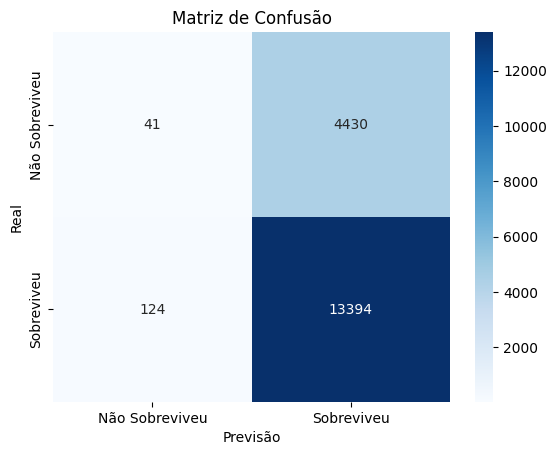

In [ ]:
from sklearn.metrics import confusion_matrix
# Importa a função 'confusion_matrix' do módulo 'metrics' da biblioteca 'sklearn'.
# Esta função gera uma matriz que descreve o desempenho do classificador
# mostrando as contagens de verdadeiros positivos, verdadeiros negativos,
# falsos positivos e falsos negativos.

import seaborn as sns
# Importa a biblioteca 'seaborn', que é construída sobre o matplotlib e fornece
# funções para criar gráficos estatísticos informativos e atraentes, incluindo mapas de calor.

import matplotlib.pyplot as plt
# Importa o módulo 'pyplot' da biblioteca 'matplotlib', utilizado para criar gráficos e visualizações em Python.

cm = confusion_matrix(y_test_survival, y_pred_survival)
# Chama a função 'confusion_matrix' para calcular a matriz de confusão.
# - 'y_test_survival': Contém os rótulos verdadeiros do conjunto de teste.
# - 'y_pred_survival': Contém as previsões do modelo para o conjunto de teste.
# O resultado, a matriz de confusão, é armazenado na variável 'cm'.

print("Matriz de Confusão:")
# Imprime um cabeçalho indicando que a saída a seguir é a matriz de confusão.

print(cm)
# Imprime a matriz de confusão calculada. Esta saída numérica mostra as contagens
# de classificações corretas e incorretas para cada classe.

# Você pode visualizar a matriz de confusão para facilitar a interpretação
# Este comentário introduz a seção de código que visualiza a matriz de confusão.

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
# Cria um mapa de calor da matriz de confusão usando a função 'heatmap' do seaborn.
# - 'cm': Os dados da matriz de confusão a serem visualizados.
# - 'annot=True': Exibe os valores numéricos (contagens) dentro de cada célula do mapa de calor.
# - 'fmt='d'': Especifica o formato dos números exibidos como inteiros ('d').
# - 'cmap='Blues'': Define o esquema de cores a ser usado para o mapa de calor (tons de azul).
# - 'xticklabels': Define os rótulos para o eixo x (as previsões do modelo).
# - 'yticklabels': Define os rótulos para o eixo y (os valores reais).

plt.xlabel('Previsão')
# Define o rótulo do eixo x do gráfico como 'Previsão'.

plt.ylabel('Real')
# Define o rótulo do eixo y do gráfico como 'Real' (os valores verdadeiros).

plt.title('Matriz de Confusão')
# Define o título do gráfico como 'Matriz de Confusão'.

plt.show()
# Exibe o gráfico da matriz de confusão gerado pelo matplotlib.
# A visualização torna mais fácil entender a distribuição das previsões corretas e incorretas entre as classes.

# **Geração do Relatório de Classificação para Avaliação Detalhada do Modelo de Sobrevivência**

In [ ]:
from sklearn.metrics import classification_report
# Importa a função 'classification_report' do módulo 'metrics' da biblioteca 'sklearn'.
# Esta função gera um relatório de texto que fornece métricas de avaliação detalhadas
# para cada classe do problema de classificação. As métricas incluem precisão, recall,
# F1-score e suporte (o número de ocorrências reais de cada classe).

report = classification_report(y_test_survival, y_pred_survival)
# Chama a função 'classification_report' para gerar o relatório.
# - 'y_test_survival': Contém os rótulos verdadeiros (os valores reais da variável alvo)
#                    para as amostras no conjunto de teste.
# - 'y_pred_survival': Contém as previsões de classe feitas pelo modelo para as mesmas amostras.
# A função compara os rótulos verdadeiros com as previsões e calcula as métricas de desempenho para cada classe.
# O relatório gerado é armazenado na variável 'report' como uma string.

print("Relatório de Classificação:")
# Imprime um cabeçalho indicando que a saída a seguir é o relatório de classificação.

print(report)
# Imprime o relatório de classificação. Este relatório fornece uma visão detalhada
# do desempenho do modelo para cada classe individualmente, incluindo:
# - Precisão: Das amostras que o modelo classificou como pertencentes a uma classe,
#             qual proporção realmente pertence a essa classe.
# - Recall: De todas as amostras que realmente pertencem a uma classe,
#           qual proporção o modelo conseguiu classificar corretamente.
# - F1-score: A média harmônica ponderada da precisão e do recall.
# - Support: O número de amostras reais de cada classe no conjunto de teste.
# Além das métricas por classe, o relatório também inclui médias ponderadas e macro dessas métricas.

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.25      0.01      0.02      4471
         1.0       0.75      0.99      0.85     13518

    accuracy                           0.75     17989
   macro avg       0.50      0.50      0.44     17989
weighted avg       0.63      0.75      0.65     17989



# **Importação da Ferramenta de Visualização da Matriz de Confusão do Yellowbrick**

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
# Importa a classe 'ConfusionMatrix' do módulo 'classifier' da biblioteca 'yellowbrick'.
# Yellowbrick é uma biblioteca de visualização para machine learning que se integra bem
# com o scikit-learn. A classe 'ConfusionMatrix' oferece uma representação gráfica
# da matriz de confusão, facilitando a interpretação do desempenho de um classificador
# ao exibir os verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

import matplotlib.pyplot as plt # Para exibir o gráfico
# Importa o módulo 'pyplot' da biblioteca 'matplotlib'.
# Matplotlib é uma biblioteca de plotagem fundamental em Python, e 'pyplot' é uma coleção
# de funções que fazem o matplotlib funcionar como uma interface de plotagem semelhante
# ao MATLAB. É necessário importar 'pyplot' para exibir a visualização da matriz de confusão
# gerada pela classe 'ConfusionMatrix' do Yellowbrick.

# **Visualização da Matriz de Confusão com Yellowbrick para Avaliação do Modelo de Sobrevivência**

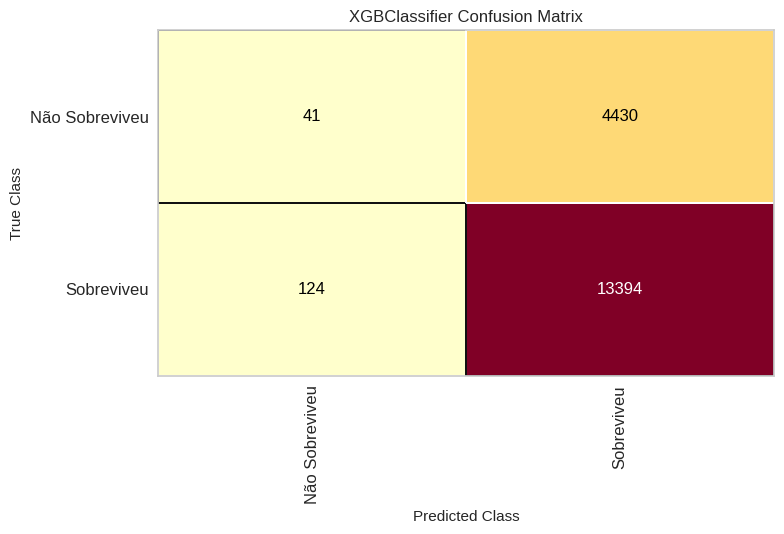

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
# Importa a classe 'ConfusionMatrix' do módulo 'classifier' da biblioteca 'yellowbrick'.
# Esta classe fornece uma representação visual da matriz de confusão, facilitando a análise
# do desempenho de um classificador ao exibir as contagens de verdadeiros positivos,
# verdadeiros negativos, falsos positivos e falsos negativos.

import matplotlib.pyplot as plt
# Importa o módulo 'pyplot' da biblioteca 'matplotlib', essencial para exibir gráficos e visualizações
# geradas por outras bibliotecas, como o Yellowbrick.

# Supondo que 'model' seja sua instância treinada do XGBClassifier
# Este comentário assume que você já treinou um modelo XGBoost e o armazenou na variável 'model'.
cm = ConfusionMatrix(model, classes=['Não Sobreviveu', 'Sobreviveu']) # Adapte os nomes das classes se necessário
# Cria uma instância do visualizador 'ConfusionMatrix' do Yellowbrick.
# - 'model': O classificador XGBoost previamente treinado que será avaliado.
# - 'classes': Uma lista opcional contendo os nomes das classes alvo. Isso melhora a legibilidade
#              do gráfico, rotulando os eixos corretamente. Certifique-se de que a ordem corresponde
#              à ordem das classes nos seus dados alvo (por exemplo, 0 e 1).

# Ajuste o visualizador aos dados de treinamento
# Este comentário indica a etapa de "ajuste" do visualizador aos dados de treinamento.
cm.fit(X_train_survival, y_train_survival)
# O método 'fit()' do visualizador 'ConfusionMatrix' recebe os dados de treinamento.
# Embora a matriz de confusão seja avaliada nos dados de teste, o visualizador pode usar
# as informações dos dados de treinamento (como as classes presentes) para configurar a visualização.

# Avalie o modelo nos dados de teste usando o visualizador e exiba a matriz de confusão
# Este comentário descreve a etapa de avaliação do modelo nos dados de teste e a exibição da matriz.
cm.score(X_test_survival, y_test_survival)
# O método 'score()' do visualizador 'ConfusionMatrix' recebe os dados de teste e os rótulos verdadeiros.
# Ele usa o modelo treinado para fazer previsões nos dados de teste e então compara essas
# previsões com os rótulos verdadeiros para calcular e exibir a matriz de confusão visualmente.

cm.show() # Ou plt.show()
# Exibe a visualização da matriz de confusão gerada pelo Yellowbrick.
# 'cm.show()' é um método específico do Yellowbrick para mostrar a figura.
# Alternativamente, 'plt.show()' do matplotlib também pode ser usado para exibir a figura.

# **Geração e Exibição do Relatório de Classificação Detalhado**

In [ ]:
from sklearn.metrics import classification_report
# Importa a função 'classification_report' do módulo 'metrics' da biblioteca 'sklearn'.
# Esta função é fundamental para obter uma avaliação detalhada do desempenho de um
# classificador, fornecendo métricas como precisão, recall, F1-score e suporte para
# cada classe presente na variável alvo.

# Supondo que y_test_survival contenha os valores reais do seu conjunto de teste
# e y_pred_survival contenha as previsões feitas pelo seu modelo
# Este comentário reforça a necessidade de ter os rótulos verdadeiros e as previsões
# do modelo para o conjunto de teste antes de gerar o relatório.

report = classification_report(y_test_survival, y_pred_survival)
# Chama a função 'classification_report' para gerar o relatório de avaliação.
# - 'y_test_survival': Um array ou Series contendo os rótulos verdadeiros das amostras
#                    no conjunto de teste. Estes são os valores reais da variável alvo.
# - 'y_pred_survival': Um array ou Series contendo as previsões de classe geradas pelo
#                    modelo para as mesmas amostras no conjunto de teste.
# A função compara cada previsão com o valor real correspondente e calcula as métricas
# de desempenho para cada classe individualmente, além de fornecer médias gerais.
# O relatório é retornado como uma string formatada e armazenada na variável 'report'.

print(report)
# Imprime o relatório de classificação gerado. Este relatório textual detalha o
# desempenho do modelo para cada classe, mostrando a precisão (qualidade das previsões positivas),
# o recall (capacidade de encontrar todas as instâncias positivas), o F1-score (média
# harmônica de precisão e recall) e o suporte (o número de instâncias reais de cada classe).
# É uma ferramenta essencial para entender os pontos fortes e fracos do modelo.

              precision    recall  f1-score   support

         0.0       0.25      0.01      0.02      4471
         1.0       0.75      0.99      0.85     13518

    accuracy                           0.75     17989
   macro avg       0.50      0.50      0.44     17989
weighted avg       0.63      0.75      0.65     17989



# **Geração e Exibição da Matriz de Confusão com scikit-learn**

In [ ]:
from sklearn.metrics import confusion_matrix
# Importa a função 'confusion_matrix' do módulo 'metrics' da biblioteca 'sklearn'.
# Esta função é utilizada para calcular a matriz de confusão, uma tabela que descreve
# o desempenho de um classificador ao mostrar as contagens de verdadeiros positivos,
# verdadeiros negativos, falsos positivos e falsos negativos. É uma ferramenta fundamental
# para entender os tipos de erros que um modelo está cometendo.

# Supondo que y_test_survival sejam os rótulos verdadeiros e y_pred_survival sejam as previsões
# Este comentário enfatiza a necessidade de ter os rótulos verdadeiros do conjunto de teste
# ('y_test_survival') e as previsões geradas pelo modelo para esse mesmo conjunto ('y_pred_survival')
# para calcular a matriz de confusão.

cm = confusion_matrix(y_test_survival, y_pred_survival)
# Chama a função 'confusion_matrix' para calcular a matriz.
# - 'y_test_survival': Um array ou Series contendo os rótulos reais das amostras no conjunto de teste.
# - 'y_pred_survival': Um array ou Series contendo as previsões de classe feitas pelo modelo
#                    para as mesmas amostras no conjunto de teste.
# O resultado, que é a matriz de confusão (um array NumPy), é armazenado na variável 'cm'.

print("Matriz de Confusão:")
# Imprime um cabeçalho para identificar a saída como a matriz de confusão.

print(cm)
# Imprime a matriz de confusão calculada. Esta saída numérica mostra as contagens
# de classificações corretas e incorretas. A organização da matriz depende da ordem
# das classes nos seus dados. Em um problema binário, geralmente as linhas representam
# as classes reais e as colunas representam as classes previstas (ou vice-versa).
# Analisar esses números ajuda a entender o desempenho do modelo em cada classe.

Matriz de Confusão:
[[   41  4430]
 [  124 13394]]


* Verdadeiros Negativos (TN): 41

O modelo previu que 41 pacientes não sobreviveram, e eles realmente não sobreviveram.

* Falsos Positivos (FP): 4430

O modelo previu que 4430 pacientes sobreviveram, mas na verdade não sobreviveram. Este é um número muito alto de erros do Tipo I.

* Falsos Negativos (FN): 124

O modelo previu que 124 pacientes não sobreviveram, mas na verdade sobreviveram. Este é um número relativamente baixo de erros do Tipo II em comparação com os Falsos Positivos.

* Verdadeiros Positivos (TP): 13394

O modelo previu que 13394 pacientes sobreviveram, e eles realmente sobreviveram. Este é o maior número na matriz.
Interpretação Preliminar:

O modelo parece ter uma forte tendência a prever que os pacientes sobreviverão (alto número de Verdadeiros Positivos), mas também comete muitos erros ao classificar pacientes que não sobreviveram como sobreviventes (altíssimo número de Falsos Positivos).

O número de Verdadeiros Negativos é muito baixo em comparação com o número de Falsos Positivos, indicando que o modelo tem dificuldade em identificar corretamente os pacientes que não sobreviveram.

O número de Falsos Negativos é relativamente baixo, o que significa que o modelo não erra tanto ao prever que um paciente que sobreviveu, na verdade não sobreviveu.

# **VALIDAÇÃO CRUZADA**

# **Preparação para Validação Cruzada com scikit-learn**

In [ ]:
from sklearn.model_selection import cross_val_score
# Importa a função 'cross_val_score' para realizar a validação cruzada.

from sklearn.model_selection import StratifiedKFold
# Importa a classe 'StratifiedKFold' para criar as divisões dos dados na validação cruzada,
# mantendo a proporção das classes em cada fold.

# **Configuração da Validação Cruzada K-Fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Separando os dados em folds (estratificado)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Cria uma instância da classe 'StratifiedKFold' para realizar a validação cruzada estratificada.
# - 'n_splits=5': Especifica o número de folds (k) a serem criados (similar ao KFold).
# - 'shuffle=True': Define se os dados devem ser embaralhados antes de serem divididos em folds (similar ao KFold).
# - 'random_state=42': Define uma semente para reprodutibilidade (similar ao KFold).
# A principal diferença do StratifiedKFold é que ele garante que cada fold contenha aproximadamente
# a mesma porcentagem de amostras de cada classe que o conjunto de dados original.
# A instância 'stratified_kfold' será usada com 'cross_val_score' para uma avaliação mais robusta.

# **Avaliação do Modelo XGBoost com Validação Cruzada Estratificada**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Criando o modelo
# Inicializa o classificador XGBoost com hiperparâmetros específicos.
modelo = XGBClassifier(max_depth=3,         # Define a profundidade máxima de cada árvore para controlar a complexidade do modelo.
                        learning_rate=0.1,    # Controla a taxa de aprendizado, influenciando a velocidade e a estabilidade do treinamento.
                        n_estimators=100,     # Define o número de árvores de boosting a serem construídas.
                        objective='binary:logistic', # Especifica a função objetivo para classificação binária (probabilidades).
                        random_state=42)      # Garante a reprodutibilidade dos resultados.

# Configurando a validação cruzada estratificada
# Cria uma instância do StratifiedKFold para realizar a validação cruzada, mantendo a proporção das classes.
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliando o modelo usando validação cruzada
# Aplica a validação cruzada ao modelo usando os dados de features (X), a variável alvo de sobrevivência (y_survival)
# e a estratégia de divisão estratificada (stratified_kfold). A métrica de avaliação padrão para classificação é a acurácia.
resultado = cross_val_score(modelo, X, y_survival, cv=stratified_kfold)

# Usamos a média e o desvio padrão dos resultados da validação cruzada
# Calcula a média e o desvio padrão das acurácias obtidas em cada fold da validação cruzada.
print("Acurácia média: %0.2f%%" % (resultado.mean() * 100))
# Imprime a acurácia média do modelo, multiplicada por 100 para exibir em porcentagem, formatada para duas casas decimais.
# O operador '&' que você usou ('&100') é um AND bit a bit e não é o correto para multiplicar por 100.
# Ele foi substituído por '* 100' para realizar a multiplicação corretamente.

Acurácia média: 74.87%


# **Avaliação Robusta do Modelo XGBoost com Validação Cruzada Repetida (Corrigido e Completo)**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

resultados_x_g_boost = []
# Inicializa uma lista vazia para armazenar as acurácias médias de cada repetição da validação cruzada.

n_repeticoes = 30
# Define o número de vezes que a validação cruzada será repetida.

for i in range(n_repeticoes):
    print(f"Repetição da Validação Cruzada: {i+1}")
    # Imprime o número da repetição atual para acompanhar o processo.

    # Configurando a validação cruzada estratificada para cada repetição
    # É importante criar uma nova instância do StratifiedKFold em cada repetição
    # para garantir divisões diferentes (devido ao random_state variar).
    stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    # Cria uma instância do StratifiedKFold com 5 folds, embaralhamento ativado
    # e uma semente aleatória diferente em cada repetição (o valor de 'i').

    # Criando o modelo XGBoost
    x_g_boost = XGBClassifier(objective='binary:logistic',
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3,
                              random_state=42) # A semente do modelo permanece constante

    # Avaliando o modelo usando validação cruzada
    scores = cross_val_score(x_g_boost, X, y_survival, cv=stratified_kfold, scoring='accuracy')
    # Executa a validação cruzada usando o modelo XGBoost, os dados de features (X),
    # a variável alvo de sobrevivência (y_survival), a estratégia de divisão estratificada
    # e especificando a métrica de avaliação como 'accuracy'.
    # 'scores' conterá um array com a acurácia obtida em cada um dos 5 folds.

    # Armazenando a acurácia média da repetição atual
    resultados_x_g_boost.append(scores.mean())
    # Calcula a média das acurácias obtidas nos folds da repetição atual
    # e adiciona essa média à lista 'resultados_x_g_boost'.

# Após as 30 repetições, calcula e exibe as estatísticas dos resultados
print("\nResultados da Validação Cruzada Repetida:")
print(f"Acurácia Média Geral: {np.mean(resultados_x_g_boost):.4f}")
print(f"Desvio Padrão da Acurácia: {np.std(resultados_x_g_boost):.4f}")
# Imprime a acurácia média geral obtida ao longo das 30 repetições e o desvio padrão,
# fornecendo uma medida da variabilidade do desempenho do modelo.

Repetição da Validação Cruzada: 1
Repetição da Validação Cruzada: 2
Repetição da Validação Cruzada: 3
Repetição da Validação Cruzada: 4
Repetição da Validação Cruzada: 5
Repetição da Validação Cruzada: 6
Repetição da Validação Cruzada: 7
Repetição da Validação Cruzada: 8
Repetição da Validação Cruzada: 9
Repetição da Validação Cruzada: 10
Repetição da Validação Cruzada: 11
Repetição da Validação Cruzada: 12
Repetição da Validação Cruzada: 13
Repetição da Validação Cruzada: 14
Repetição da Validação Cruzada: 15
Repetição da Validação Cruzada: 16
Repetição da Validação Cruzada: 17
Repetição da Validação Cruzada: 18
Repetição da Validação Cruzada: 19
Repetição da Validação Cruzada: 20
Repetição da Validação Cruzada: 21
Repetição da Validação Cruzada: 22
Repetição da Validação Cruzada: 23
Repetição da Validação Cruzada: 24
Repetição da Validação Cruzada: 25
Repetição da Validação Cruzada: 26
Repetição da Validação Cruzada: 27
Repetição da Validação Cruzada: 28
Repetição da Validação Cruzad

# **Avaliação Detalhada do Modelo XGBoost para Sobrevivência com Validação Cruzada (Precisão, Recall, F1-Score e Acurácia)**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Importa as ferramentas necessárias para realizar a validação cruzada estratificada
# ('StratifiedKFold') e para avaliar o desempenho do modelo ('cross_val_score') do scikit-learn.
# A validação cruzada é uma técnica robusta para estimar o desempenho de um modelo em dados não vistos.

from xgboost import XGBClassifier
# Importa a classe 'XGBClassifier' da biblioteca xgboost, que implementa o algoritmo de
# Gradient Boosting, um método poderoso para tarefas de classificação.

# Dados (X, y_survival já definidos)
# Este comentário assume que você já preparou suas variáveis independentes ('X')
# e a variável dependente para sobrevivência ('y_survival'). 'X' deve conter as
# features para o modelo, e 'y_survival' deve conter os rótulos de sobrevivência (e.g., 0 e 1).

# Modelo
modelo = XGBClassifier(objective='binary:logistic', random_state=42)
# Cria uma instância do classificador XGBoost.
# - 'objective='binary:logistic'': Especifica a função objetivo para problemas de
#   classificação binária, que retornará probabilidades para as classes.
# - 'random_state=42': Define uma semente para o gerador de números aleatórios,
#   garantindo que os resultados sejam reproduzíveis.

# Estratégia de Validação Cruzada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Cria uma instância da estratégia de validação cruzada Stratified K-Fold.
# - 'n_splits=5': Define o número de folds (partes) em que os dados serão divididos.
#   Neste caso, serão 5 folds.
# - 'shuffle=True': Embaralha os dados antes de dividi-los em folds, o que ajuda a
#   reduzir o impacto da ordem dos dados.
# - 'random_state=42': Define uma semente para o embaralhamento, garantindo a
#   reprodutibilidade da divisão dos dados.
# O Stratified K-Fold garante que cada fold contenha aproximadamente a mesma
# proporção de amostras de cada classe que o conjunto de dados original, o que é
# importante para conjuntos de dados desbalanceados.

# Avaliando Precisão
precision_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='precision')
# Utiliza a função 'cross_val_score' para avaliar a precisão do modelo usando a
# estratégia de validação cruzada definida ('stratified_kfold').
# - 'modelo': O classificador XGBoost que será avaliado.
# - 'X': As features do conjunto de dados.
# - 'y_survival': A variável alvo de sobrevivência.
# - 'cv=stratified_kfold': Especifica a estratégia de validação cruzada a ser usada.
# - 'scoring='precision'': Define a métrica de avaliação como precisão. A precisão mede
#   a proporção de previsões positivas que foram realmente corretas (TP / (TP + FP)).
# A função retorna um array contendo os scores de precisão para cada fold.
print(f"Precisão média (validação cruzada): {precision_scores.mean():.4f}")
# Calcula e imprime a média dos scores de precisão obtidos nos diferentes folds.
# A formatação '{:.4f}' garante que o resultado seja exibido com quatro casas decimais.

# Avaliando Recall
recall_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='recall')
# Similar à precisão, mas avalia o recall do modelo usando validação cruzada.
# O recall mede a proporção de instâncias positivas reais que foram corretamente
# identificadas pelo modelo (TP / (TP + FN)).
print(f"Recall médio (validação cruzada): {recall_scores.mean():.4f}")
# Calcula e imprime a média dos scores de recall.

# Avaliando F1-Score
f1_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='f1')
# Avalia o F1-Score do modelo usando validação cruzada.
# O F1-Score é a média harmônica da precisão e do recall, fornecendo uma medida
# equilibrada do desempenho do modelo, especialmente em conjuntos de dados desbalanceados.
print(f"F1-Score médio (validação cruzada): {f1_scores.mean():.4f}")
# Calcula e imprime a média dos scores de F1-Score.

# Avaliando Acurácia (para comparação)
accuracy_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='accuracy')
# Avalia a acurácia do modelo usando validação cruzada.
# A acurácia mede a proporção de todas as previsões (positivas e negativas) que foram corretas.
print(f"Acurácia média (validação cruzada): {accuracy_scores.mean():.4f}")
# Calcula e imprime a média dos scores de acurácia para fornecer um ponto de referência.

Precisão média (validação cruzada): 0.7487
Recall médio (validação cruzada): 0.9909
F1-Score médio (validação cruzada): 0.8529
Acurácia média (validação cruzada): 0.7441


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

# Dados (X, y_survival já definidos)
# Modelo
modelo = XGBClassifier(objective='binary:logistic', random_state=42)
# Estratégia de Validação Cruzada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliando Precisão
precision_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='precision')
print(f"Precisão média (validação cruzada): {precision_scores.mean():.4f}")

# Avaliando Recall
recall_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='recall')
print(f"Recall médio (validação cruzada): {recall_scores.mean():.4f}")

# Avaliando F1-Score
f1_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='f1')
print(f"F1-Score médio (validação cruzada): {f1_scores.mean():.4f}")

# Avaliando Acurácia (para comparação)
accuracy_scores = cross_val_score(modelo, X, y_survival, cv=stratified_kfold, scoring='accuracy')
print(f"Acurácia média (validação cruzada): {accuracy_scores.mean():.4f}")

Precisão média (validação cruzada): 0.7487
Recall médio (validação cruzada): 0.9909
F1-Score médio (validação cruzada): 0.8529
Acurácia média (validação cruzada): 0.7441


# **Avaliação Abrangente do Modelo XGBoost para Sobrevivência com Validação Cruzada (Acurácia, Precisão, Recall e F1-Score Simultaneamente)**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
# Importa as ferramentas necessárias para realizar a validação cruzada estratificada
# ('StratifiedKFold') e para avaliar o desempenho do modelo com múltiplas métricas
# simultaneamente ('cross_validate') do scikit-learn.

from xgboost import XGBClassifier
# Importa a classe 'XGBClassifier' da biblioteca xgboost, que implementa o algoritmo de
# Gradient Boosting, um método poderoso para tarefas de classificação.

# Dados (X, y_survival já definidos)
# Este comentário assume que você já preparou suas variáveis independentes ('X')
# e a variável dependente para sobrevivência ('y_survival'). 'X' deve conter as
# features para o modelo, e 'y_survival' deve conter os rótulos de sobrevivência (e.g., 0 e 1).

# Modelo
modelo = XGBClassifier(objective='binary:logistic', random_state=42)
# Cria uma instância do classificador XGBoost.
# - 'objective='binary:logistic'': Especifica a função objetivo para problemas de
#   classificação binária, que retornará probabilidades para as classes.
# - 'random_state=42': Define uma semente para o gerador de números aleatórios,
#   garantindo que os resultados sejam reproduzíveis.

# Estratégia de Validação Cruzada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Cria uma instância da estratégia de validação cruzada Stratified K-Fold.
# - 'n_splits=5': Define o número de folds (partes) em que os dados serão divididos.
#   Neste caso, serão 5 folds.
# - 'shuffle=True': Embaralha os dados antes de dividi-los em folds para reduzir o
#   impacto da ordem dos dados.
# - 'random_state=42': Define uma semente para o embaralhamento, garantindo a
#   reprodutibilidade da divisão.
# O Stratified K-Fold mantém a proporção das classes em cada fold, sendo ideal para
# conjuntos de dados potencialmente desbalanceados.

# Avaliando múltiplas métricas com cross_validate
scoring = ['accuracy', 'precision', 'recall', 'f1']
# Define uma lista das métricas que serão avaliadas durante a validação cruzada:
# - 'accuracy': Proporção de previsões corretas.
# - 'precision': Das previsões positivas, quantas foram realmente corretas (TP / (TP + FP)).
# - 'recall': De todas as instâncias positivas reais, quantas foram corretamente identificadas (TP / (TP + FN)).
# - 'f1': Média harmônica de precisão e recall, útil para equilibrar as duas métricas.

resultados = cross_validate(modelo, X, y_survival, cv=stratified_kfold, scoring=scoring, return_train_score=False)
# Utiliza a função 'cross_validate' para realizar a validação cruzada e avaliar múltiplas métricas.
# - 'modelo': O classificador XGBoost a ser avaliado.
# - 'X': As features do conjunto de dados.
# - 'y_survival': A variável alvo de sobrevivência.
# - 'cv=stratified_kfold': Especifica a estratégia de validação cruzada estratificada.
# - 'scoring=scoring': Define a lista de métricas a serem calculadas.
# - 'return_train_score=False': Indica que não queremos os scores no conjunto de treinamento.
# A função retorna um dicionário contendo arrays com os scores para cada métrica em cada fold.

print("Resultados da Validação Cruzada:")
# Imprime um cabeçalho para os resultados da validação cruzada.

print(f"Acurácia média: {resultados['test_accuracy'].mean():.4f}")
# Imprime a média da acurácia obtida nos diferentes folds. 'resultados['test_accuracy']'
# contém um array com os scores de acurácia para cada fold. '.mean()' calcula a média.
# '{:.4f}' formata a saída para quatro casas decimais.

print(f"Precisão média: {resultados['test_precision'].mean():.4f}")
# Imprime a média da precisão obtida nos diferentes folds.

print(f"Recall médio: {resultados['test_recall'].mean():.4f}")
# Imprime a média do recall obtido nos diferentes folds.

print(f"F1-Score médio: {resultados['test_f1'].mean():.4f}")
# Imprime a média do F1-Score obtido nos diferentes folds.

Resultados da Validação Cruzada:
Acurácia média: 0.7441
Precisão média: 0.7487
Recall médio: 0.9909
F1-Score médio: 0.8529


# **Explicação das Métricas de Avaliação do Modelo de Sobrevivência (Validação Cruzada):**

As métricas que você obteve através da validação cruzada fornecem diferentes perspectivas sobre o desempenho do seu modelo XGBoost na tarefa de prever a sobrevivência (assumindo que a classe positiva seja "Sobreviveu"). Vamos detalhar cada uma delas:

1. Precisão Média (Validação Cruzada): 0.7487

Serve para: Avaliar a qualidade das previsões positivas feitas pelo modelo. Especificamente, ela responde à pergunta: "De todos os pacientes que o modelo previu que sobreviveriam, qual proporção realmente sobreviveu?".
Função: Calcula a média da precisão obtida em cada fold da validação cruzada. A precisão é definida como:
Precisão = Verdadeiros Positivos (TP) / (Verdadeiros Positivos (TP) + Falsos Positivos (FP))
Verdadeiros Positivos (TP): Pacientes que realmente sobreviveram e foram corretamente previstos como sobreviventes.

Falsos Positivos (FP): Pacientes que não sobreviveram, mas foram incorretamente previstos como sobreviventes.
Interpretação: Uma precisão média de 0.7487 (ou 74.87%) sugere que, em média, cerca de 74.87% das vezes que o modelo previu que um paciente sobreviveria, essa previsão estava correta. Os restantes 25.13% das previsões de sobrevivência foram de pacientes que, na verdade, não sobreviveram.

2. Recall Médio (Validação Cruzada): 0.9909

Serve para: Avaliar a capacidade do modelo de encontrar todas as instâncias positivas reais. Em outras palavras, responde à pergunta: "De todos os pacientes que realmente sobreviveram, qual proporção o modelo conseguiu identificar corretamente?".
Função: Calcula a média do recall (também conhecido como sensibilidade ou taxa de verdadeiros positivos) obtido em cada fold da validação cruzada. O recall é definido como:
Recall = Verdadeiros Positivos (TP) / (Verdadeiros Positivos (TP) + Falsos Negativos (FN))
Falsos Negativos (FN): Pacientes que realmente sobreviveram, mas foram incorretamente previstos como não sobreviventes.
Interpretação: Um recall médio de 0.9909 (ou 99.09%) indica que, em média, o modelo conseguiu identificar corretamente aproximadamente 99.09% de todos os pacientes que realmente sobreviveram. Isso sugere uma alta sensibilidade do modelo para a classe "Sobreviveu", cometendo poucos erros ao classificar um paciente sobrevivente como não sobrevivente.

3. F1-Score Médio (Validação Cruzada): 0.8529

Serve para: Fornecer uma métrica única que equilibra a precisão e o recall. É especialmente útil quando há um desequilíbrio entre as classes. O F1-Score tenta encontrar um bom compromisso entre a capacidade do modelo de não rotular erroneamente a classe negativa como positiva (precisão) e sua capacidade de encontrar todas as instâncias positivas (recall).
Função: Calcula a média do F1-Score obtido em cada fold da validação cruzada. O F1-Score é a média harmônica da precisão e do recall:
F1-Score = 2 * (Precisão * Recall) / (Precisão + Recall)
Interpretação: Um F1-Score médio de 0.8529 (ou 85.29%) representa um bom equilíbrio entre a precisão e o recall para a classe "Sobreviveu". Ele sugere que o modelo tem um desempenho razoavelmente bom tanto em não fazer previsões falsas de sobrevivência quanto em identificar a maioria dos pacientes que realmente sobreviveram.

4. Acurácia Média (Validação Cruzada): 0.7441

Serve para: Avaliar a proporção geral de previsões corretas (tanto para a classe "Sobreviveu" quanto para a classe "Não Sobreviveu") em relação ao número total de amostras. Responde à pergunta: "De todos os pacientes no conjunto de dados, qual proporção o modelo classificou corretamente?".
Função: Calcula a média da acurácia obtida em cada fold da validação cruzada. A acurácia é definida como:
Acurácia = (Verdadeiros Positivos (TP) + Verdadeiros Negativos (TN)) / (Total de Amostras)
Verdadeiros Negativos (TN): Pacientes que realmente não sobreviveram e foram corretamente previstos como não sobreviventes.
Interpretação: Uma acurácia média de 0.7441 (ou 74.41%) indica que, em média, o modelo classificou corretamente cerca de 74.41% de todos os pacientes no conjunto de dados nos diferentes folds da validação cruzada.

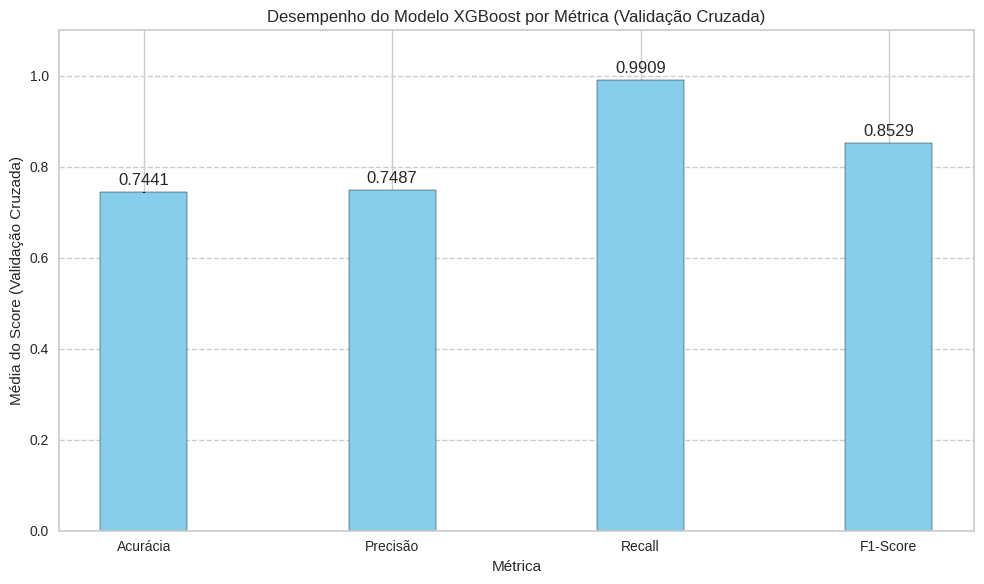

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier

# Supondo que X e y_survival já estejam definidos

# Inicializando o modelo
modelo = XGBClassifier(objective='binary:logistic', random_state=42)

# Definindo a estratégia de validação cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas que queremos avaliar
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Realizando a validação cruzada
resultados = cross_validate(modelo, X, y_survival, cv=stratified_kfold, scoring=scoring, return_train_score=False)

# Extraindo as médias e desvios padrão das métricas
means = {
    'Acurácia': resultados['test_accuracy'].mean(),
    'Precisão': resultados['test_precision'].mean(),
    'Recall': resultados['test_recall'].mean(),
    'F1-Score': resultados['test_f1'].mean()
}

stds = {
    'Acurácia': resultados['test_accuracy'].std(),
    'Precisão': resultados['test_precision'].std(),
    'Recall': resultados['test_recall'].std(),
    'F1-Score': resultados['test_f1'].std()
}

# Criando o gráfico de barras com barras de erro
metrics = list(means.keys())
mean_values = list(means.values())
std_values = list(stds.values())

x = np.arange(len(metrics))  # Localização das barras
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(x, mean_values, width, yerr=std_values, capsize=5, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
ax.set_ylabel('Média do Score (Validação Cruzada)')
ax.set_xlabel('Métrica')
ax.set_title('Desempenho do Modelo XGBoost por Métrica (Validação Cruzada)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)  # Ajustando o limite do eixo y para melhor visualização

# Adicionando anotações com os valores médios
def autolabel(rects):
    """Adiciona um rótulo com o valor acima de cada barra."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos verticalmente deslocado
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

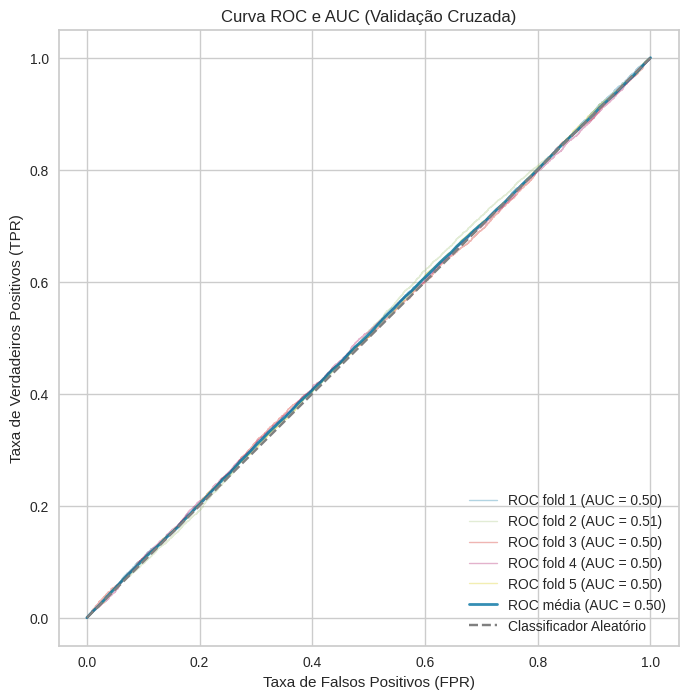

AUC Média (Validação Cruzada): 0.5039


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
import numpy as np

# Supondo que X e y_survival já estejam definidos

# Inicializando o modelo
modelo = XGBClassifier(objective='binary:logistic', random_state=42)

# Definindo a estratégia de validação cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para armazenar as curvas ROC e AUCs de cada fold
fprs = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(8, 8))

for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y_survival)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_survival.iloc[train_index], y_survival.iloc[test_index]

    # Treinando o modelo em cada fold
    modelo.fit(X_train, y_train)

    # Obtendo as probabilidades de classe positiva (Sobreviveu)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    # Calculando a curva ROC e a AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    # Interpolando a curva ROC para calcular a média
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0

    fprs.append(fpr)
    tprs.append(interp_tpr)
    aucs.append(auc)

    # Plotando a curva ROC para cada fold (opcional)
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f'ROC fold {i+1} (AUC = {auc:.2f})')

# Calculando a média da curva ROC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = roc_auc_score(y_survival, modelo.predict_proba(X)[:, 1]) # AUC no conjunto completo (pode ser viesado)

# Plotando a curva ROC média
ax.plot(mean_fpr, mean_tpr, color='b', label=f'ROC média (AUC = {np.mean(aucs):.2f})', lw=2, alpha=0.8)

# Plotando a linha diagonal (classificador aleatório)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Classificador Aleatório')

# Configurando o gráfico
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Curva ROC e AUC (Validação Cruzada)")
ax.set_xlabel("Taxa de Falsos Positivos (FPR)")
ax.set_ylabel("Taxa de Verdadeiros Positivos (TPR)")
ax.legend(loc="lower right")
ax.grid(True)
plt.show()

print(f"AUC Média (Validação Cruzada): {np.mean(aucs):.4f}")